In [ ]:
# import libraries and dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype, is_numeric_dtype

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
warnings.filterwarnings("ignore")
df = pd.read_csv("Train_Test_IoT_Motion_Light.csv")
df.head()

,ts,date,time,motion_status,light_status,label,type
0,1556246497,25-Apr-19,19:41:37,0,off,1,ddos
1,1556246502,25-Apr-19,19:41:42,1,on,1,ddos
2,1556246503,25-Apr-19,19:41:43,0,off,1,ddos
3,1556246508,25-Apr-19,19:41:48,1,on,1,ddos
4,1556246508,25-Apr-19,19:41:48,0,off,1,ddos


In [ ]:
# address missing value
df.isnull().sum()
missing_count = df.isnull().sum() # the count of missing values
value_count = df.isnull().count() # the count of all values
missing_percentage = round(missing_count / value_count * 100, 1) #the percentage of missing values
missing_df = pd.DataFrame({'count': missing_count, 'percentage': missing_percentage}) #create a dataframe
print(missing_df)

               count  percentage
ts                 0         0.0
date               0         0.0
time               0         0.0
motion_status      0         0.0
light_status       0         0.0
label              0         0.0
type               0         0.0


In [ ]:
# calculate duplicates 
dups = df.duplicated() 
# report if there are any duplicates 
print(dups.any()) 
# list all duplicate rows 
print(df[dups])
print(df.shape) 
# delete duplicate rows 
df.drop_duplicates(inplace=True) 
print(df.shape)

True
               ts       date        time  motion_status light_status  label  \
19     1556246565  25-Apr-19   19:42:45               0          off      1   
55     1556246699  25-Apr-19   19:44:59               0          off      1   
57     1556246704  25-Apr-19   19:45:04               1           on      1   
59     1556246719  25-Apr-19   19:45:19               1           on      1   
139    1556247131  25-Apr-19   19:52:11               1           on      1   
...           ...        ...         ...            ...          ...    ...   
59440  1554160000   1-Apr-19   16:06:40               0          off      0   
59443  1554160005   1-Apr-19   16:06:45               1           on      0   
59465  1554160041   1-Apr-19   16:07:21               0          off      0   
59469  1554160046   1-Apr-19   16:07:26               1           on      0   
59481  1554160068   1-Apr-19   16:07:48               0          off      0   

         type  
19       ddos  
55       ddos 

In [ ]:
type('date')

str

In [ ]:
type('time')

str

In [ ]:
df['date'] = pd.to_datetime(df['date'])
print(df)

               ts       date        time  motion_status light_status  label  \
0      1556246497 2019-04-25   19:41:37               0          off      1   
1      1556246502 2019-04-25   19:41:42               1           on      1   
2      1556246503 2019-04-25   19:41:43               0          off      1   
3      1556246508 2019-04-25   19:41:48               1           on      1   
4      1556246508 2019-04-25   19:41:48               0          off      1   
...           ...        ...         ...            ...          ...    ...   
59483  1554160073 2019-04-01   16:07:53               0          off      0   
59484  1554160073 2019-04-01   16:07:53               1           on      0   
59485  1554160074 2019-04-01   16:07:54               0          off      0   
59486  1554160075 2019-04-01   16:07:55               0          off      0   
59487  1554160078 2019-04-01   16:07:58               0          off      0   

         type  
0        ddos  
1        ddos  
2  

In [ ]:
#Transform string to date
df['date'] = pd.to_datetime(df.date, format="%d-%m-%Y")

In [ ]:
#Extracting Year
df['year'] = df['date'].dt.year

#Extracting Month
df['month'] = df['date'].dt.month

#Extracting the weekday name of the date
df['day_name'] = df['date'].dt.day_name()

In [ ]:
# dealing with attribute time
#new data frame with split value columns
new = df['time'].str.split(':',n=2,expand=True)

In [ ]:
# making separate first name column from new data frame
df["hour"]= new[0]
df["min"]= new[1]
df["sec"]= new[2]

In [ ]:
df['month'] = df['month'].astype(int)

In [ ]:
df['hour'] = df['hour'].astype(int)

In [ ]:

df['hour_sin'] = np.sin((df.hour-1)*(2.*np.pi/24))
df['hour_cos'] = np.cos((df.hour-1)*(2.*np.pi/24))

df['month_sin'] = np.sin((df.month-1)*(2.*np.pi/12))
df['month_cos'] = np.cos((df.month-1)*(2.*np.pi/12))

In [ ]:
df

,ts,date,time,motion_status,light_status,label,type,year,month,day_name,hour,min,sec,hour_sin,hour_cos,month_sin,month_cos
0,1556246497,2019-04-25,19:41:37,0,off,1,ddos,2019,4,Thursday,19,41,37,-1.000000,-1.836970e-16,1.0,6.123234e-17
1,1556246502,2019-04-25,19:41:42,1,on,1,ddos,2019,4,Thursday,19,41,42,-1.000000,-1.836970e-16,1.0,6.123234e-17
2,1556246503,2019-04-25,19:41:43,0,off,1,ddos,2019,4,Thursday,19,41,43,-1.000000,-1.836970e-16,1.0,6.123234e-17
3,1556246508,2019-04-25,19:41:48,1,on,1,ddos,2019,4,Thursday,19,41,48,-1.000000,-1.836970e-16,1.0,6.123234e-17
4,1556246508,2019-04-25,19:41:48,0,off,1,ddos,2019,4,Thursday,19,41,48,-1.000000,-1.836970e-16,1.0,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59483,1554160073,2019-04-01,16:07:53,0,off,0,normal,2019,4,Monday,16,07,53,-0.707107,-7.071068e-01,1.0,6.123234e-17
59484,1554160073,2019-04-01,16:07:53,1,on,0,normal,2019,4,Monday,16,07,53,-0.707107,-7.071068e-01,1.0,6.123234e-17
59485,1554160074,2019-04-01,16:07:54,0,off,0,normal,2019,4,Monday,16,07,54,-0.707107,-7.071068e-01,1.0,6.123234e-17
59486,1554160075,2019-04-01,16:07:55,0,off,0,normal,2019,4,Monday,16,07,55,-0.707107,-7.071068e-01,1.0,6.123234e-17


In [ ]:
# address missing value
df.isnull().sum()
missing_count = df.isnull().sum() # the count of missing values
value_count = df.isnull().count() # the count of all values
missing_percentage = round(missing_count / value_count * 100, 1) #the percentage of missing values
missing_df = pd.DataFrame({'count': missing_count, 'percentage': missing_percentage}) #create a dataframe
print(missing_df)

               count  percentage
ts                 0         0.0
date               0         0.0
time               0         0.0
motion_status      0         0.0
light_status       0         0.0
label              0         0.0
type               0         0.0
year               0         0.0
month              0         0.0
day_name           0         0.0
hour               0         0.0
min                0         0.0
sec                0         0.0
hour_sin           0         0.0
hour_cos           0         0.0
month_sin          0         0.0
month_cos          0         0.0


In [ ]:
# drop columns 
df = df.drop(['ts', 'time','type','date','min','sec','year'], axis=1)

In [ ]:
df

,motion_status,light_status,label,month,day_name,hour,hour_sin,hour_cos,month_sin,month_cos
0,0,off,1,4,Thursday,19,-1.000000,-1.836970e-16,1.0,6.123234e-17
1,1,on,1,4,Thursday,19,-1.000000,-1.836970e-16,1.0,6.123234e-17
2,0,off,1,4,Thursday,19,-1.000000,-1.836970e-16,1.0,6.123234e-17
3,1,on,1,4,Thursday,19,-1.000000,-1.836970e-16,1.0,6.123234e-17
4,0,off,1,4,Thursday,19,-1.000000,-1.836970e-16,1.0,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...
59483,0,off,0,4,Monday,16,-0.707107,-7.071068e-01,1.0,6.123234e-17
59484,1,on,0,4,Monday,16,-0.707107,-7.071068e-01,1.0,6.123234e-17
59485,0,off,0,4,Monday,16,-0.707107,-7.071068e-01,1.0,6.123234e-17
59486,0,off,0,4,Monday,16,-0.707107,-7.071068e-01,1.0,6.123234e-17


In [ ]:
# transform hour to int
df['hour'] = df['hour'].astype(int)

In [ ]:
type('hour')

str

In [ ]:
# transform int to string
df['label'] = df['label'].astype(str)

In [ ]:
df['motion_status'] = df['motion_status'].astype(str)

In [ ]:
# populate the numerical and categorical variables
num_list = []
cat_list = []
for column in df:
   if column != 'label': # separate lable
       if is_numeric_dtype(df[column]):
           num_list.append(column)
       elif is_string_dtype(df[column]):
           cat_list.append(column)

In [ ]:
num_list


['month', 'hour', 'hour_sin', 'hour_cos', 'month_sin', 'month_cos']

In [ ]:
cat_list

['motion_status', 'light_status', 'day_name']

In [ ]:
### 2. Feature Engineering and EDA  ###

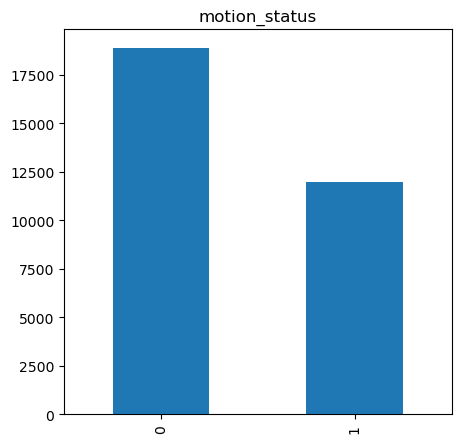

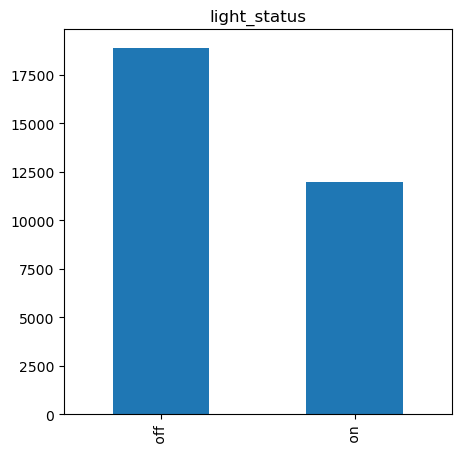

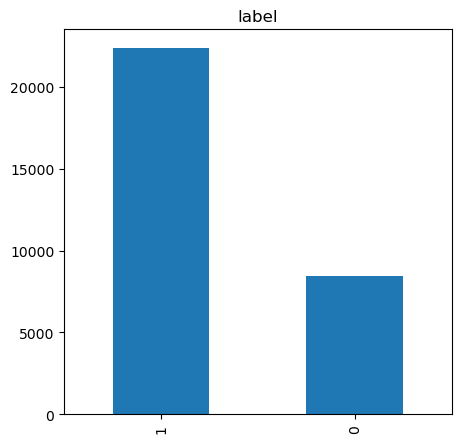

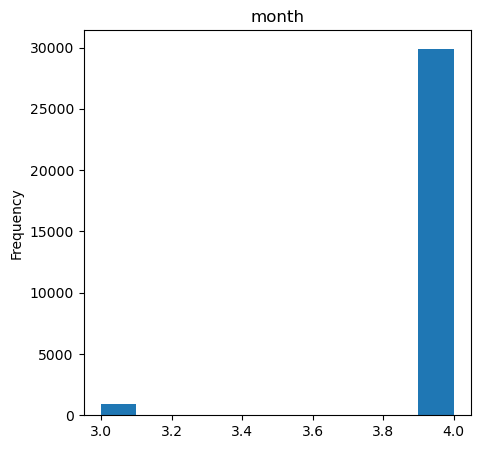

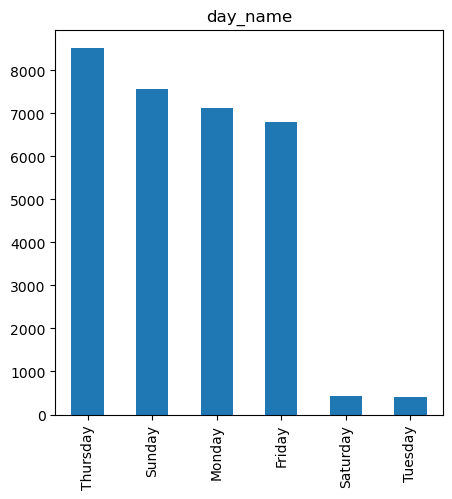

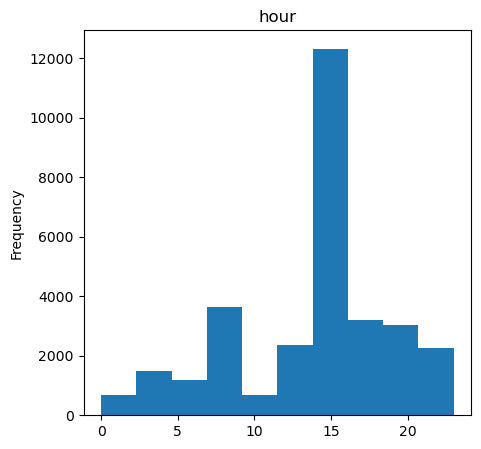

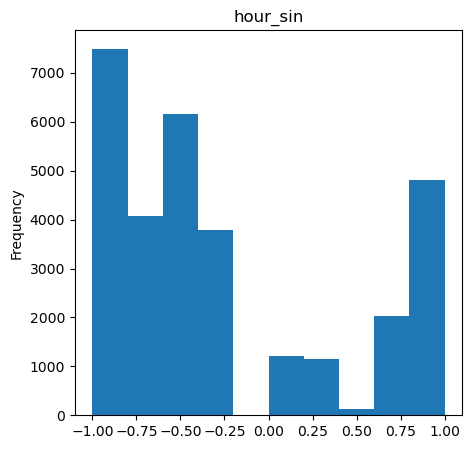

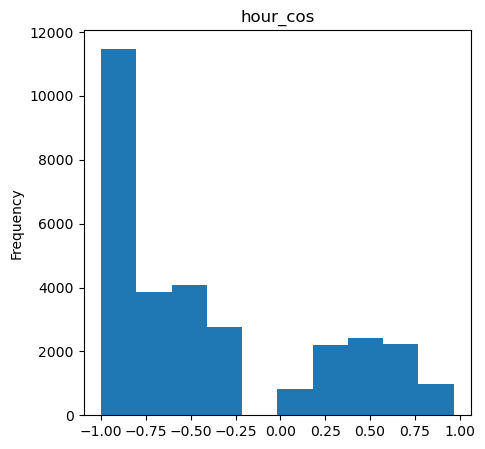

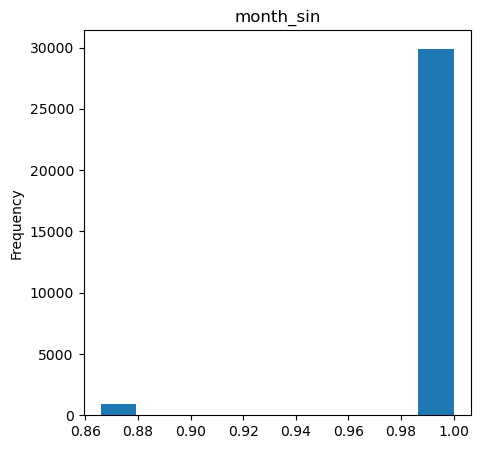

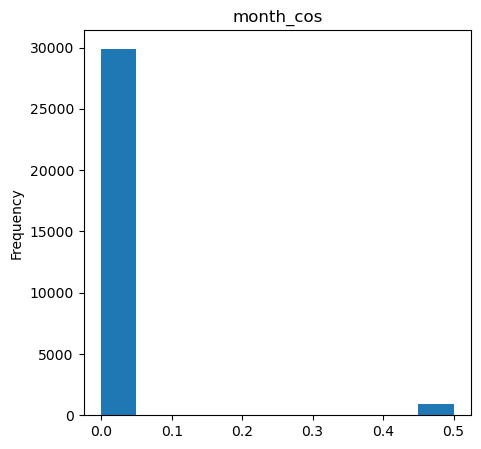

In [ ]:
# univariate analysis
for column in df:
   plt.figure(column, figsize = (5,5))
   plt.title(column)
   if is_numeric_dtype(df[column]):
       df[column].plot(kind = 'hist')
   elif is_string_dtype(df[column]):
       df[column].value_counts()[:10].plot(kind = 'bar')


In [ ]:
# encoding categorical data using dummies
from sklearn.preprocessing import LabelEncoder
categorical_features = ['label']
for i in categorical_features:
   df[i] = LabelEncoder().fit_transform(df[i])

In [ ]:
import category_encoders as ce
encoder= ce.BinaryEncoder(cols=['motion_status','day_name','light_status'],return_df=True)

In [ ]:
df=encoder.fit_transform(df) 

In [ ]:
list(df.columns)

['motion_status_0',
 'motion_status_1',
 'light_status_0',
 'light_status_1',
 'label',
 'month',
 'day_name_0',
 'day_name_1',
 'day_name_2',
 'hour',
 'hour_sin',
 'hour_cos',
 'month_sin',
 'month_cos']

In [ ]:
df=df[['hour_sin',
 'hour_cos',
 'month_sin',
 'month_cos','motion_status_0',
 'motion_status_1',
 'light_status_0',
 'light_status_1','day_name_0',
 'day_name_1',
 'day_name_2','label']]

In [ ]:
#numerical variables for scaling
n = df.iloc[:,:-8]

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing

scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(n)
robust_df = pd.DataFrame(robust_df, columns =['hour_sin',
 'hour_cos',
 'month_sin',
 'month_cos'])

In [ ]:
extracted_col= df[['motion_status_0',
 'motion_status_1',
 'light_status_0',
 'light_status_1','day_name_0',
 'day_name_1',
 'day_name_2','label']]


In [ ]:
# reset index
robust_df.reset_index(drop=True, inplace=True)
extracted_col.reset_index(drop=True, inplace=True)

In [ ]:
standardized_df = robust_df.join(extracted_col)

In [ ]:
standardized_df

,hour_sin,hour_cos,month_sin,month_cos,motion_status_0,motion_status_1,light_status_0,light_status_1,day_name_0,day_name_1,day_name_2,label
0,-0.517638,0.444506,0.0,0.0,0,1,0,1,0,0,1,1
1,-0.517638,0.444506,0.0,0.0,1,0,1,0,0,0,1,1
2,-0.517638,0.444506,0.0,0.0,0,1,0,1,0,0,1,1
3,-0.517638,0.444506,0.0,0.0,1,0,1,0,0,0,1,1
4,-0.517638,0.444506,0.0,0.0,0,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
30854,-0.214413,-0.184120,0.0,0.0,0,1,0,1,0,1,1,0
30855,-0.214413,-0.184120,0.0,0.0,1,0,1,0,0,1,1,0
30856,-0.214413,-0.184120,0.0,0.0,0,1,0,1,0,1,1,0
30857,-0.214413,-0.184120,0.0,0.0,0,1,0,1,0,1,1,0


In [ ]:

X = standardized_df.iloc[:,:-1]
y = standardized_df["label"]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
 
from sklearn.linear_model import LassoCV
from sklearn.model_selection import StratifiedKFold

X = standardized_df.iloc[:,:-1]
y = standardized_df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)



lr = LogisticRegression(penalty='l1',C=1, solver='liblinear', max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      2543
           1       0.98      1.00      0.99      6715

    accuracy                           0.99      9258
   macro avg       0.99      0.98      0.98      9258
weighted avg       0.99      0.99      0.99      9258



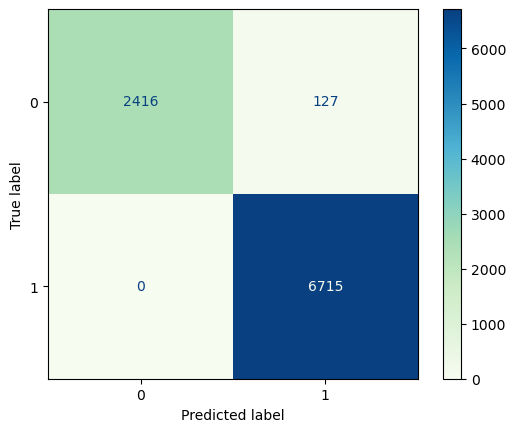

In [ ]:
from sklearn import metrics

# confusion matrix
confusion_matrix = metrics.plot_confusion_matrix(lr, X_test, y_test, cmap = "GnBu")
print(confusion_matrix)

# accuracy
print(classification_report(y_test, y_pred))